In [2]:
# Import data libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
data = pd.read_csv('tfidf_vector_turbo_vpn_review.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1134,1135,1136,1137,1138,1139,1140,1141,1142,label
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,Positif
1,0.0,0.0,0.0,0.207948,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.195023,0.0,Positif
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,Positif
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,Positif
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.108154,0.0,0.0,0.0,0.0,0.000000,0.0,Negatif


In [4]:
# Create dummy variable for the label
coded = []

for label in data['label']:
    if label == 'Positif':
        coded.append(1)
    elif label == 'Negatif':
        coded.append(-1)
    else:
        coded.append(0)

data['label_coded'] = coded
data = data.drop('label', axis=1)

# Assign X and y variable
X = data.iloc[:, 0:1143]
y = data['label_coded']

In [5]:
# Import SVM libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
# Split the train test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    stratify=y, random_state=42)

In [7]:
# Preparing the model
model = SVC()

param_grid = {'C':[1, 10, 100, 1000],
              'gamma':[1, 0.1, 0.01, 0.001]}

In [8]:
# Doing cross validation
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    scoring='accuracy',
                    n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy')

In [9]:
# Selecting the best model
best_parameter = grid.best_params_
best_model = grid.best_estimator_

# Making prediction
y_pred = best_model.predict(X_test)

In [10]:
# making comparison
comp = pd.DataFrame({'initial_label':y_test, 'predicted':y_pred})

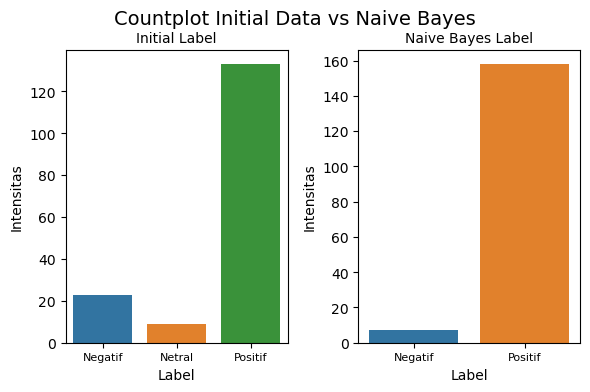

In [18]:
# Visualizing data
fig, ax = plt.subplots(1,2, figsize=(6,4))

sns.countplot(data=comp, x='initial_label', ax=ax[0])
sns.countplot(data=comp, x='predicted', ax=ax[1])
fig.suptitle('Countplot Initial Data vs Naive Bayes', fontsize=14)
fig.tight_layout()
ax[0].set_title('Initial Label', fontsize=10)
ax[0].set_xlabel('Label', fontsize=10)
ax[0].set_ylabel('Intensitas', fontsize=10)
ax[0].set_xticklabels(['Negatif', 'Netral', 'Positif'], fontsize=8)
ax[1].set_title('Naive Bayes Label', fontsize=10)
ax[1].set_xlabel('Label', fontsize=10)
ax[1].set_ylabel('Intensitas', fontsize=10)
ax[1].set_xticklabels(['Negatif', 'Positif'], fontsize=8)
plt.show()

In [11]:
# Measure the accuracy
print('Akurasi dari model adalah: ', accuracy_score(y_test, y_pred))
print('Perbandingan confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Laporan Classifikasi \n', classification_report(y_test, y_pred))
print('Parameter paling optimal untuk model ini adalah:', best_parameter)

Akurasi dari model adalah:  0.8
Perbandingan confusion matrix: 
 [[  3   0  20]
 [  0   0   9]
 [  4   0 129]]
Laporan Classifikasi 
               precision    recall  f1-score   support

          -1       0.43      0.13      0.20        23
           0       0.00      0.00      0.00         9
           1       0.82      0.97      0.89       133

    accuracy                           0.80       165
   macro avg       0.42      0.37      0.36       165
weighted avg       0.72      0.80      0.74       165

Parameter paling optimal untuk model ini adalah: {'C': 100, 'gamma': 0.01}


C:\Users\septi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\septi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\septi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
